In [203]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
import cufflinks as cf
cf.go_offline()
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

The world is being hit with an invisible enemy, COVID-19 has changed our lives for good. We are in a complete lockdown, and we had to make major changes in our lifestyles and businesses, the impacts of the virus is spreading, disrupting everyday life in Milan and everywhere else in the world, cutting shopping, disrupting global supply chains, real estate market and threatening the economy, whatever crisis management responses guides that may have existed weeks ago now seem to be from another time, the situation is forcing everyone to evolve and adapt their strategies and creativity in real-time. 

According to a report issued by McKinsey & Company, more than 40 percent of the global luxury-goods production happens in Italy, and all the Italian factories have temporarily shut down.

Since the stock market has had to deal with some major changes on its own. In this project, we will build a Python script to analyze the impacts of COVID-19 on stock prices regarding the Milan & Paris Stock Exchanges. We will explore the performance of some of the biggest fashion companies on the market to see how good or bad they have stood against the COVID-19 storm. We will take as reference stock prices before the outbreak in Italy and compare it to the same stock prices a few weeks later until April 21st. We will be doing this by conducting different analysis and by computing daily price changes for multiple stocks. After, we will try to explore the relationship between the stock prices and the daily new numbers of coronavirus cases in Italy.

The companies under investigations are:

AEF.MI (Aeffe in the Milan stock exchange)
MONC.MI (Moncler in the Milan stock exchange)
BC.MI (Brunello Cucinelli in the Milan stock exchange)
SFER.MI (Salvatore Ferragamo in the Milan stock exchange)
TOD.MI (Tod's in the Milan stock exchange)
MC.PA (LVMH group in the Paris stock exchange)
CDI.PA (Christian Dior in the Paris stock exchange)
KER.PA (Kering group in the Paris stock exchange)
Note: To review the code and get your hands on the dataset, please visit my profile on github, and if you are interested in exploring more projects, check my first project about Machine Learning, and the second project about the Real Estate Market COVID-19 disruption.

Let's get started and have a look on our dataset. We choose to investigate the Adj. close prices.

Adjusted closing price accurately reflect that stock's value after accounting for any corporate actions. It is considered to be the true price of that stock and is often used when examining historical returns or performing a detailed analysis of historical returns.

Notice that some days might be missing like the first day of the year as yahoo finance sometimes faces network problems.

In [2]:
df = pd.read_csv('adj_close.csv',index_col=0)
df

,AEF.MI,MONC.MI,BC.MI,SFER.MI,TOD.MI,MC.PA,CDI.PA,KER.PA
Date,,,,,,,,
2019-12-30,1.994,40.070000,31.559999,18.750,41.220001,409.308960,453.052399,582.844177
2020-01-02,2.030,40.590000,32.340000,18.955,42.000000,413.800873,455.816101,594.475220
2020-01-03,2.000,40.090000,32.119999,18.605,40.639999,413.751526,456.803131,597.358154
2020-01-06,1.942,40.070000,31.799999,18.555,39.599998,409.851929,455.223907,587.317688
2020-01-07,1.950,40.270000,34.200001,18.615,40.259998,410.691071,455.223907,592.785278
...,...,...,...,...,...,...,...,...
2020-04-15,1.058,33.209999,25.940001,12.060,28.100000,337.635468,322.170593,475.000000
2020-04-16,1.034,32.849998,26.540001,11.890,27.760000,338.425232,322.960236,477.250000
2020-04-17,1.054,34.520000,27.340000,12.150,28.340000,353.431274,343.688110,503.399994


First let's investigate the maximum and minimum adjusted close price price for each company's stock throughout the time period. Let's also use a bar plot to visualize the data, we will use a log scale for close price to normalize the values to a uniform scale. It is usually through data normalization that the information within a dataset can be formatted in such a way that it can be visualized and analyzed.

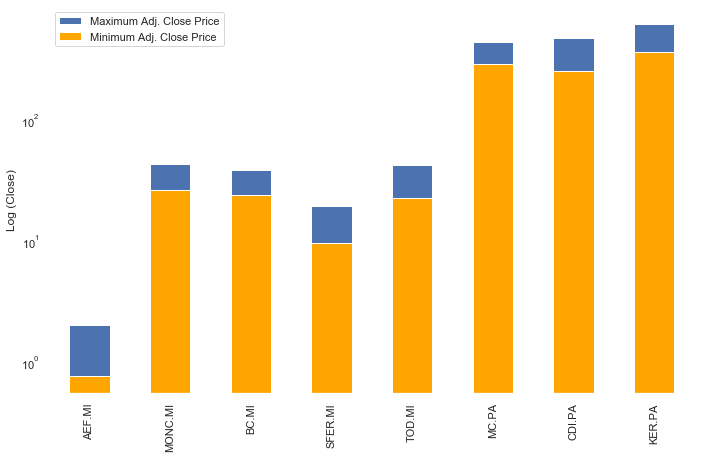

In [122]:
params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'xx-large'}
max_close = df.max()
min_close = df.min()
plt.figure(figsize=(10,6))
plt.yscale('log')
plt.tight_layout()
plt.ylabel('Log (Close)')
max_close.plot(kind='bar',label='Maximum Adj. Close Price')
min_close.plot(kind='bar',color='orange',label='Minimum Adj. Close Price')
plt.legend()

Using the graph above, stocks can be classified into two groups: Reliable stocks and Volatile stocks.

Reliable stocks are the ones that didn't show much difference between the minimum adj. close price and the maximum adj. close price in the time period specified. e.g.: Kering, LVMH, Christian Dior and Moncler. Volatile stocks are the ones that varied the most between the minimum and maximum adj. closing price of stocks. e.g.: Aeffe

Let's now try to split the data into two parts, before and after the outbreak to investigate the trends.

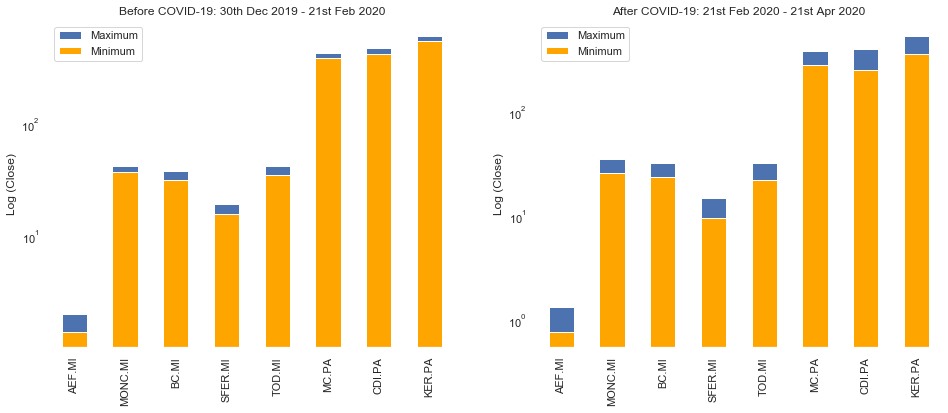

In [123]:
params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'xx-large'}

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(16,6))


max_close_pre_corona = df.loc['2019-12-30':'2020-02-21'].max()
min_close_pre_corona = df.loc['2019-12-30':'2020-02-21'].min()
#plot
max_close_pre_corona.plot(kind='bar',ax = axes[0],subplots=True)
min_close_pre_corona.plot(kind='bar',ax = axes[0],subplots=True,color='orange')
axes[0].set_yscale('log')
axes[0].set_ylabel('Log (Close)')
axes[0].legend(["Maximum", "Minimum"])
axes[0].set_title('Before COVID-19: 30th Dec 2019 - 21st Feb 2020')

max_close_post_corona = df.loc['2020-02-22':'2020-04-21'].max()
min_close_post_corona = df.loc['2020-02-22':'2020-04-21'].min()
#plot
max_close_post_corona.plot(kind='bar',ax = axes[1],subplots=True)
min_close_post_corona.plot(kind='bar',ax = axes[1],subplots=True,color='orange')
axes[1].set_yscale('log')
axes[1].set_ylabel('Log (Close)')
axes[1].legend(["Maximum", "Minimum"])
axes[1].set_title('After COVID-19: 21st Feb 2020 - 21st Apr 2020')

b= df.loc['2019-12-30':'2020-02-21']
dfa = df.loc['2020-02-21':'2020-04-21']

It is clear that most of the stocks pre COVID-19 period saw a change in volatility in their closing prices once the COVID-19 storm hit.

in the next analysis we will try to get the returns. A return is defined as the change in price of stocks over time, which may be represented in terms of price change or percentage change. A positive return represents a profit while a negative return marks a loss.

In [19]:
returns = df.pct_change()
returns

,AEF.MI,MONC.MI,BC.MI,SFER.MI,TOD.MI,MC.PA,CDI.PA,KER.PA
Date,,,,,,,,
2019-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,0.018054,0.012977,0.024715,0.010933,0.018923,0.010974,0.006100,0.019956
2020-01-03,-0.014778,-0.012318,-0.006803,-0.018465,-0.032381,-0.000119,0.002165,0.004850
2020-01-06,-0.029000,-0.000499,-0.009963,-0.002687,-0.025591,-0.009425,-0.003457,-0.016808
2020-01-07,0.004119,0.004991,0.075472,0.003234,0.016667,0.002047,0.000000,0.009309
...,...,...,...,...,...,...,...,...
2020-04-15,-0.083189,-0.014540,0.005426,-0.043616,-0.034364,-0.028409,-0.028571,-0.018088
2020-04-16,-0.022684,-0.010840,0.023130,-0.014096,-0.012100,0.002339,0.002451,0.004737
2020-04-17,0.019342,0.050837,0.030143,0.021867,0.020893,0.044341,0.064181,0.054793


In [20]:
returns = returns.drop(['2019-12-30'])

In [124]:
returns

,AEF.MI,MONC.MI,BC.MI,SFER.MI,TOD.MI,MC.PA,CDI.PA,KER.PA
Date,,,,,,,,
2020-01-02,0.018054,0.012977,0.024715,0.010933,0.018923,0.010974,0.006100,0.019956
2020-01-03,-0.014778,-0.012318,-0.006803,-0.018465,-0.032381,-0.000119,0.002165,0.004850
2020-01-06,-0.029000,-0.000499,-0.009963,-0.002687,-0.025591,-0.009425,-0.003457,-0.016808
2020-01-07,0.004119,0.004991,0.075472,0.003234,0.016667,0.002047,0.000000,0.009309
2020-01-08,0.005128,0.022101,0.010526,0.017459,0.010929,0.006731,0.004336,0.001677
...,...,...,...,...,...,...,...,...
2020-04-15,-0.083189,-0.014540,0.005426,-0.043616,-0.034364,-0.028409,-0.028571,-0.018088
2020-04-16,-0.022684,-0.010840,0.023130,-0.014096,-0.012100,0.002339,0.002451,0.004737
2020-04-17,0.019342,0.050837,0.030143,0.021867,0.020893,0.044341,0.064181,0.054793


In [21]:
returns.idxmin()

AEF.MI     2020-03-12
MONC.MI    2020-03-12
BC.MI      2020-03-09
SFER.MI    2020-03-12
TOD.MI     2020-02-24
MC.PA      2020-03-12
CDI.PA     2020-03-12
KER.PA     2020-03-12
dtype: object

It is interesting to note that most of these stocks had their lowest return in 12th March 2020. In that date the USA declared a national emergency, while italy had the highest number of deaths per day in the world (including China at its peak) for each of the previous four days.

In [22]:
returns.idxmax()

AEF.MI     2020-03-24
MONC.MI    2020-03-13
BC.MI      2020-03-24
SFER.MI    2020-03-19
TOD.MI     2020-03-18
MC.PA      2020-03-24
CDI.PA     2020-03-24
KER.PA     2020-03-24
dtype: object

All the companies had their highest returns in March as well. It's interesting to know that in the day of March 24th Trump announced that USA Will Be “Open for Business Very Soon”.

Now, we will try to divide the returns to two datasets, before and after COVID-19, then we will apply the standard deviation on the stock returns. In the next graphs, if the stocks occur at the right end of the chart, they are considered volatile with significant values of standard deviation while if they occur on the left they should be considered reliable. 

In [126]:
returnsB= returns.loc['2019-12-30':'2020-02-21']
returnsA = returns.loc['2020-02-22':'2020-04-21']

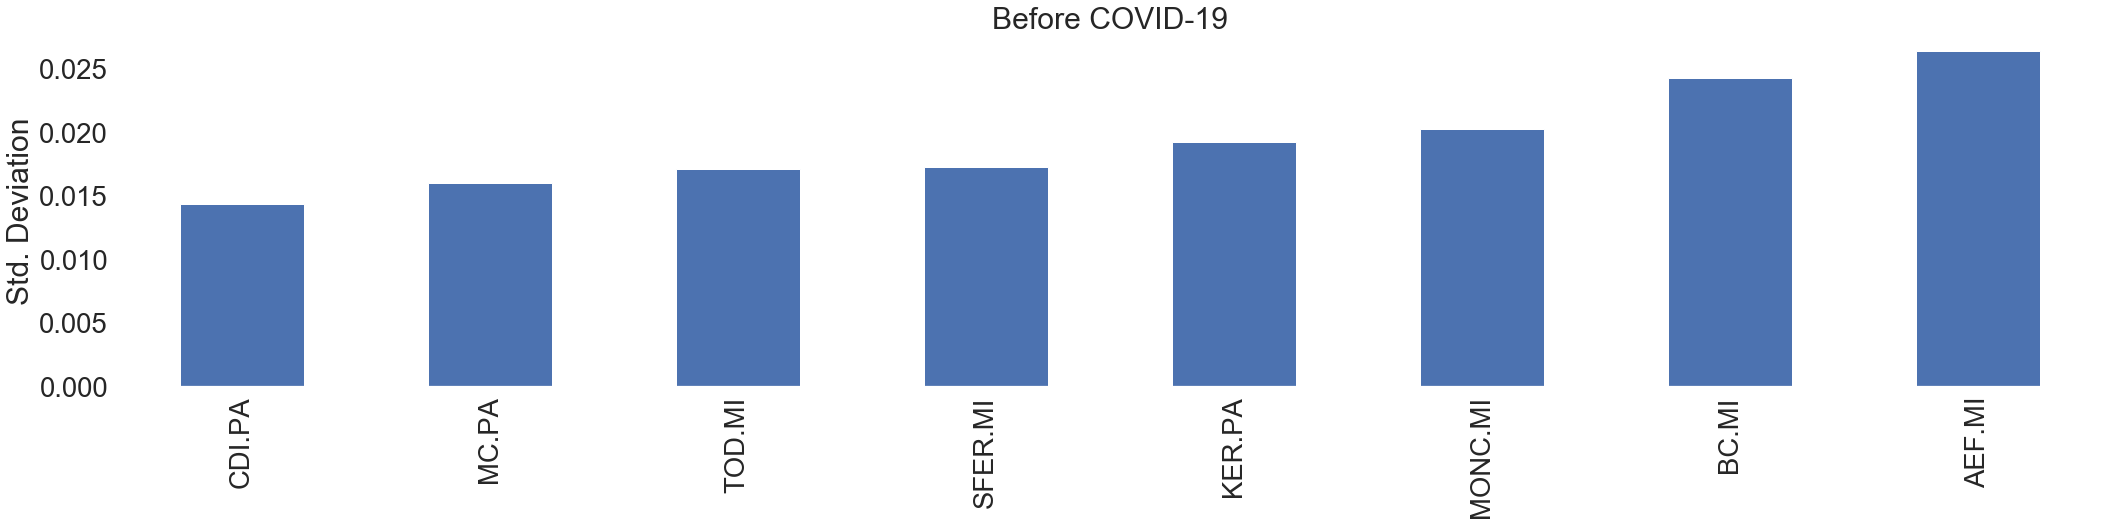

In [161]:
stdb = returnsB.std()
stda = returnsA.std()
plt.figure(figsize=(30,8))
sns.set(font_scale=2.5)
ax = stdb.sort_values().plot.bar(title="Before COVID-19")
plt.ylabel("Std. Deviation")
plt.tight_layout()
ax.set_facecolor('w')

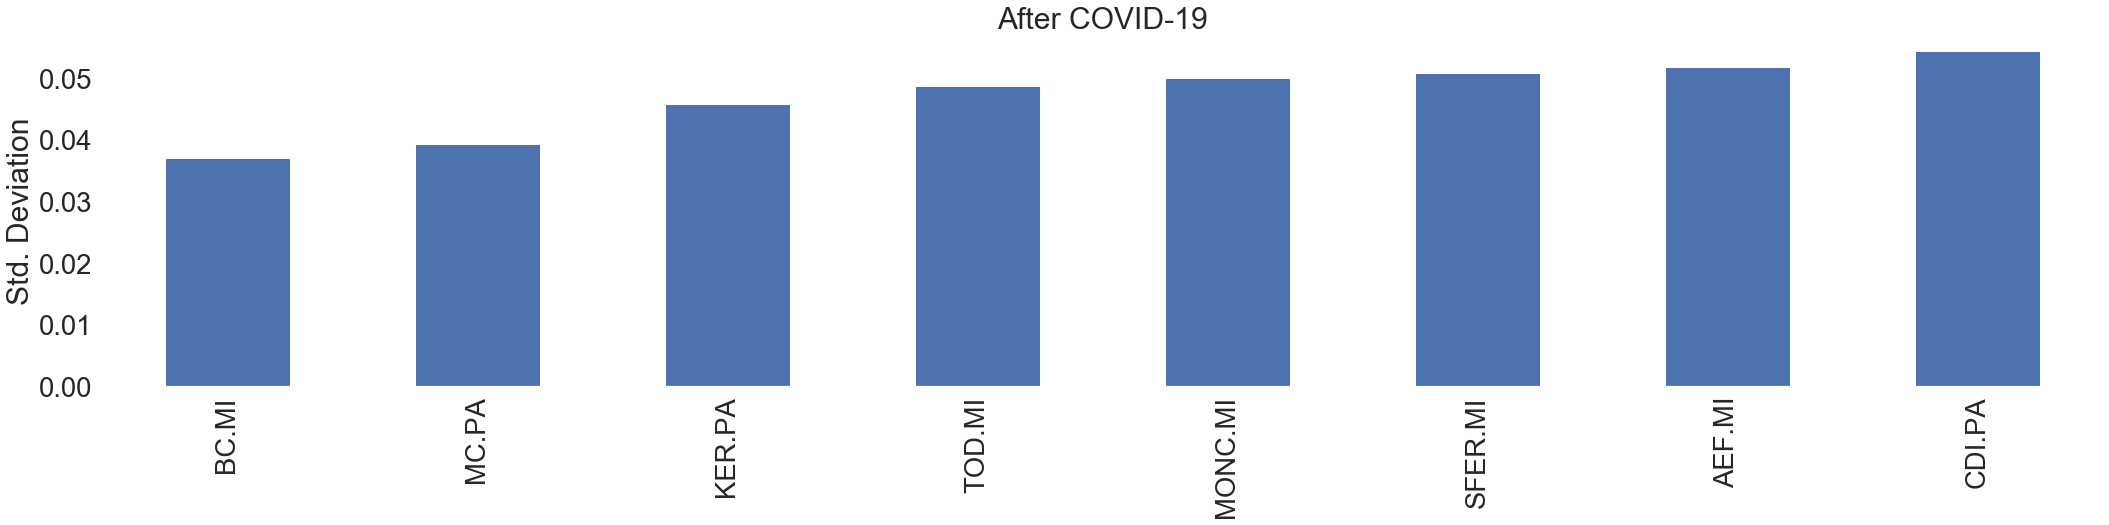

In [159]:
stda = returnsA.std()
plt.figure(figsize=(30,8))
sns.set(font_scale=2.5)
ax = stda.sort_values().plot.bar(title="After COVID-19")
plt.ylabel("Std. Deviation")
plt.tight_layout()
ax.set_facecolor('w')

It is clear that Christian Dior (CDI) has suffered the most - shifting from the most reliable stock to the most volatile stock due to the pandemic! However, Brunello Cucinelli (BC) has mad the most progress during this period, shiftung the other way around, more positive moves happened also to Moncler, Kering while LVMH has stayed the same.

To elaborate more on the impact of the COVID-19 on each of the stock prices we will divide each of the stock daily prices by the row of reference, in our example, that is the 21st of February. That will give us a more clear idea on the performance of each of them. 

In [230]:
dfb= df.loc['2019-12-30':'2020-02-21']
dfa = df.loc['2020-02-21':'2020-04-21']

In [231]:
dfa = dfa/dfa.iloc[0]

In [232]:
dfa.head()

,AEF.MI,MONC.MI,BC.MI,SFER.MI,TOD.MI,MC.PA,CDI.PA,KER.PA
Date,,,,,,,,
2020-02-21,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-02-24,0.930100,0.946433,0.972189,0.911028,0.885600,0.953399,0.949184,0.952813
2020-02-25,0.931526,0.945626,0.920193,0.914787,0.919180,0.939555,0.931469,0.933939
2020-02-26,0.961484,0.960969,0.933494,0.932957,0.916904,0.952410,0.938928,0.943732
2020-02-27,0.955778,0.949125,0.892987,0.897556,0.919180,0.914339,0.903030,0.911147


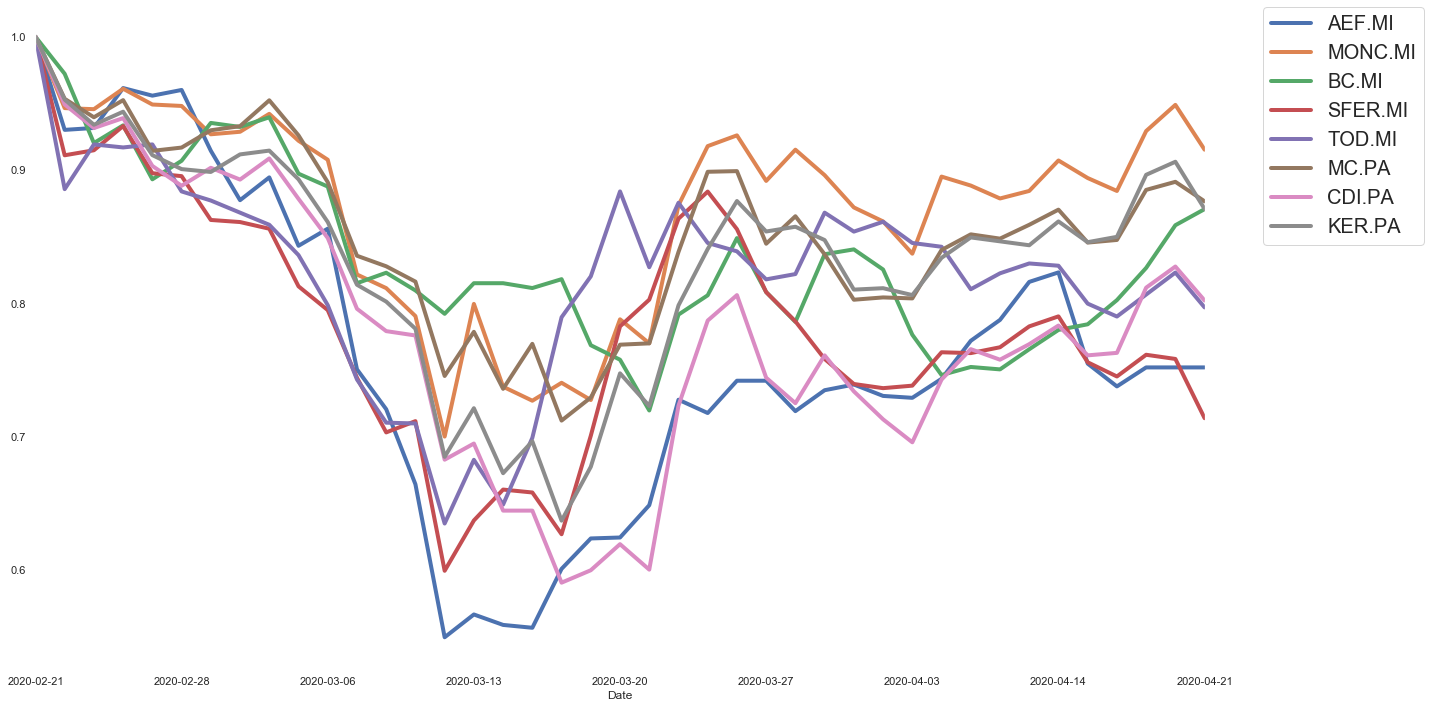

In [233]:
dfa.plot(figsize=(20,10),linewidth=4.0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,prop={'size': 20})
plt.tight_layout()

Now we can easily see the impact of COVID-19 on stock prices in percentage terms. For instance, we see that a company like Moncler, had an adj close price on 13th of March that was trading at 21% discount compare to the 21st of February.

Similarly, Brunello Cucinelli was trading at 19% discount while Kering was at trading at 28% discount.

Now we have a proof supported with data that COVID-19 had a huge impact on stock prices. But what about the period before? That is when the Virus first started in Wuhan until it arrived to Italy?

Let's recreate our analysis from 30th of December to the 21st of February. 

In [234]:
dfb = dfb/dfb.iloc[37]
dfb.head()

,AEF.MI,MONC.MI,BC.MI,SFER.MI,TOD.MI,MC.PA,CDI.PA,KER.PA
Date,,,,,,,,
2019-12-30,1.422254,1.078600,0.954051,1.174812,1.173022,1.024969,1.069930,1.037828
2020-01-02,1.447932,1.092598,0.977630,1.187657,1.195219,1.036218,1.076457,1.058539
2020-01-03,1.426534,1.079139,0.970979,1.165727,1.156517,1.036094,1.078788,1.063672
2020-01-06,1.385164,1.078600,0.961306,1.162594,1.126921,1.026329,1.075058,1.045794
2020-01-07,1.390870,1.083984,1.033857,1.166353,1.145703,1.028430,1.075058,1.055529
2020-01-08,1.398003,1.107941,1.044740,1.186717,1.158224,1.035352,1.079720,1.057299
2020-01-09,1.420827,1.107402,1.061669,1.215226,1.171315,1.049444,1.083916,1.054821
2020-01-10,1.369472,1.095828,1.061064,1.193609,1.163347,1.047342,1.085315,1.048095
2020-01-13,1.393723,1.098250,1.092503,1.181078,1.160501,1.055006,1.089977,1.051104


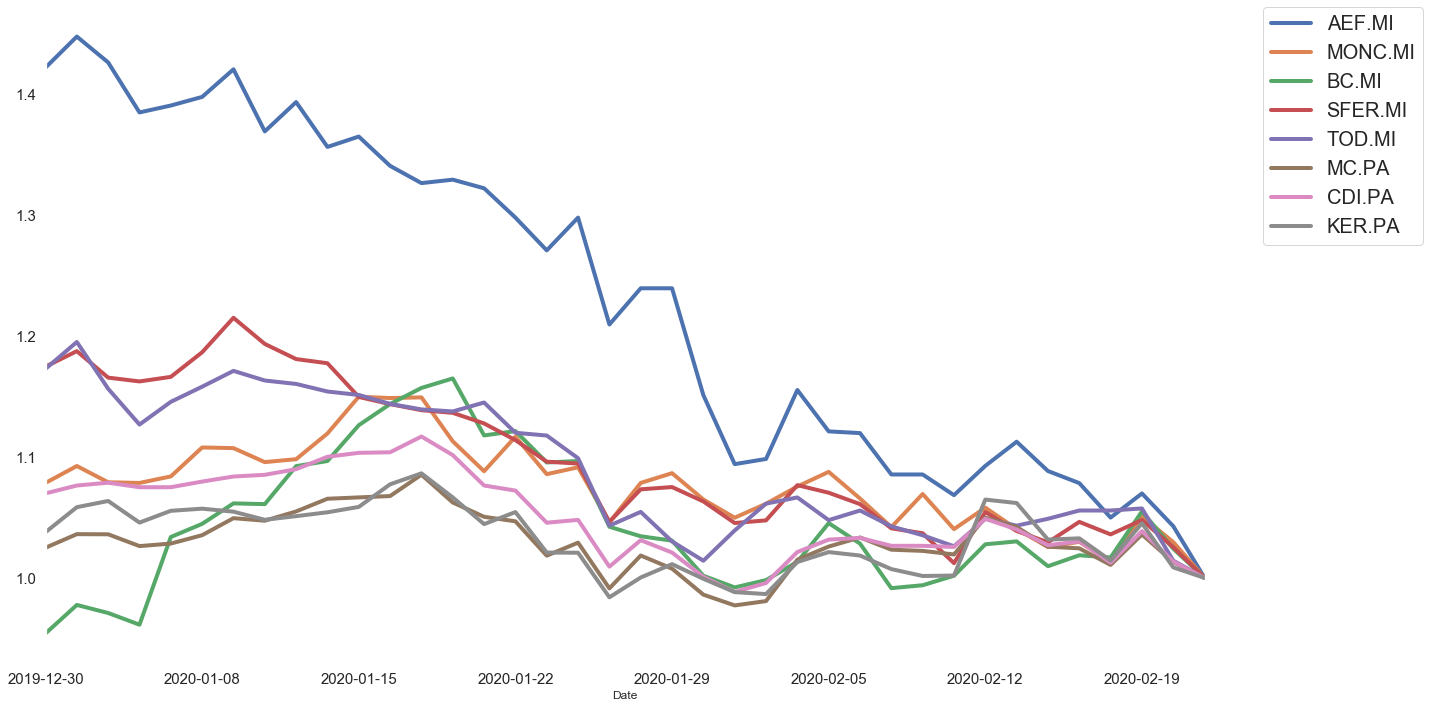

In [235]:
dfb.plot(figsize=(20,10),linewidth=4.0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,prop={'size': 20})
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

Except for Aeffe, It seems that for the majority of the stocks, the outbreak of the virus had minimum impact on stock prices when there were almost no cases in Europe while thousands were in China. It's also noticable the huge growth achieved by Brunello Cucinelli that might be connected to the fact that on the 7th of January they released preliminary figures for the year before with an increase in net revenues of 9.9%, which made the company’s shares climbed 7.6% on the Italian Stock Exchange.


Now, let's visualize the wole period

In [180]:
dfall = df/df.iloc[37]

In [181]:
dfall.head()

,AEF.MI,MONC.MI,BC.MI,SFER.MI,TOD.MI,MC.PA,CDI.PA,KER.PA
Date,,,,,,,,
2019-12-30,1.422254,1.078600,0.954051,1.174812,1.173022,1.024969,1.069930,1.037828
2020-01-02,1.447932,1.092598,0.977630,1.187657,1.195219,1.036218,1.076457,1.058539
2020-01-03,1.426534,1.079139,0.970979,1.165727,1.156517,1.036094,1.078788,1.063672
2020-01-06,1.385164,1.078600,0.961306,1.162594,1.126921,1.026329,1.075058,1.045794
2020-01-07,1.390870,1.083984,1.033857,1.166353,1.145703,1.028430,1.075058,1.055529


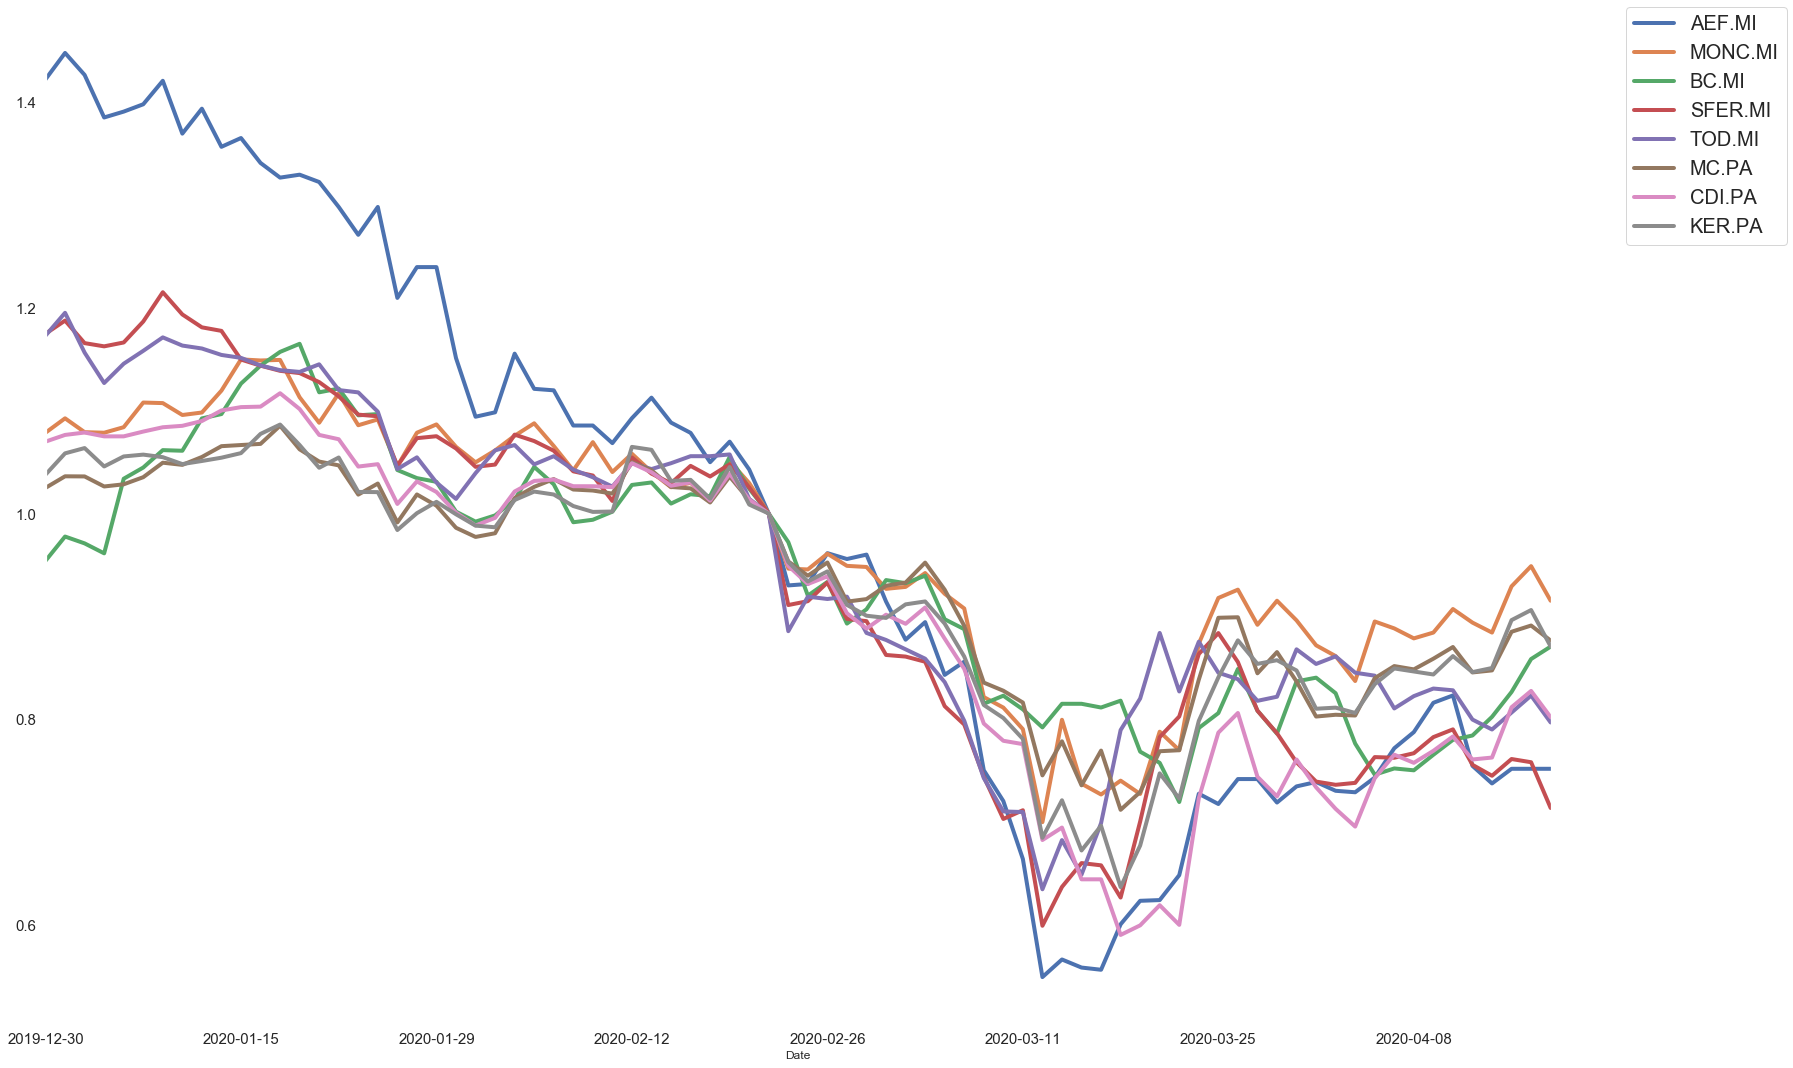

In [236]:
ax = dfall.plot(figsize=(25,15),linewidth=4.0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,prop={'size': 20})
plt.tick_params( labelsize=15)
plt.tight_layout()
ax.set_facecolor('w')

Except for Aeffe, It seems that for the majority of the stocks, the outbreak of the virus did not have an impact on stock prices when there were almost no cases in Europe while thousands were in China. It's also noticable the huge growth achieved by Brunello Cucinelli that might be connected to the fact that on the 7th of January they released preliminary figures for the year before with an increase in net revenues of 9.9%, which made the company’s shares climbed 7.6% on the Italian Stock Exchange.



Now it's time to include the COVID-19 data into our analysis. We will add data related to daily new infected cases in italy for the time period of 24th Feb until 21st Apr (since there was no data about the daily numbers on the 21st,22nd,23rd).

In [237]:
covid = pd.read_csv('adj_close with covid.csv',index_col=0)
covid.head()

,AEF.MI,MONC.MI,BC.MI,SFER.MI,TOD.MI,MC.PA,CDI.PA,KER.PA,new_cases
Date,,,,,,,,,
2020-02-24,1.304,35.160000,32.160000,14.540,31.120001,380.728394,401.923614,535.099976,221
2020-02-25,1.306,35.130001,30.440001,14.600,32.299999,375.199860,394.422089,524.500000,93
2020-02-26,1.348,35.700001,30.879999,14.890,32.220001,380.333496,397.580597,530.000000,78
2020-02-27,1.340,35.259998,29.540001,14.325,32.299999,365.130035,382.380157,511.700012,250
2020-02-28,1.346,35.220001,30.000000,14.290,31.059999,366.117279,376.063110,505.799988,238


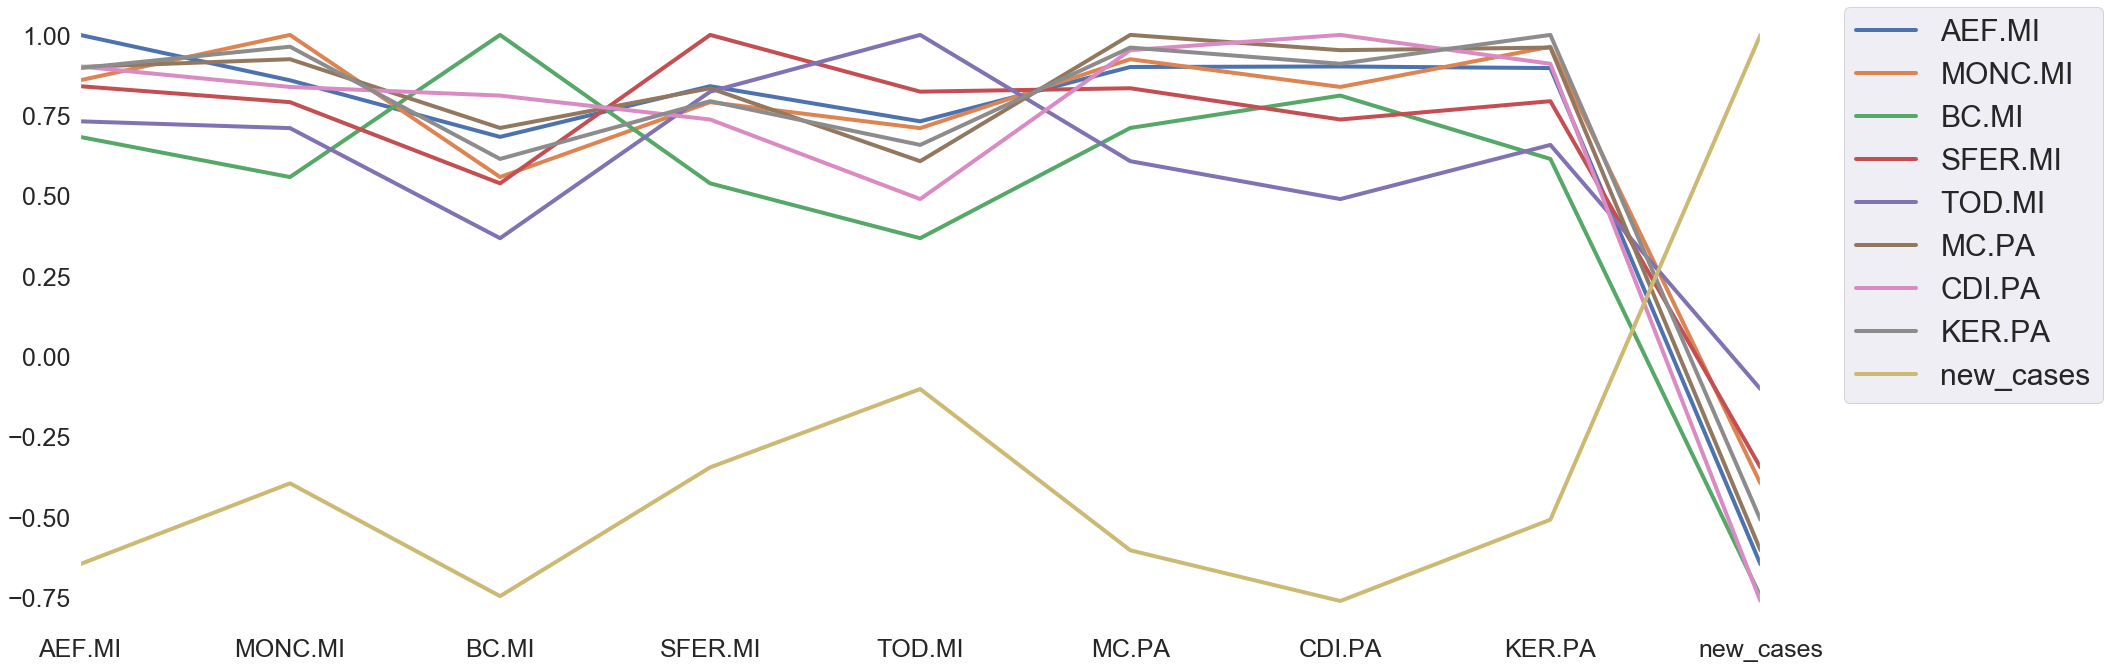

In [238]:
sns.set(font_scale=2.5)
ax = covid.corr().plot(figsize=(30,10),linewidth=4.0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,prop={'size': 30})
plt.tick_params(axis='both', which='major', labelsize=25)
plt.tight_layout()
ax.set_facecolor('w')

We can see clearly see the trend, in most of the cases, number of COVID-19 cases increases the stock price decrease.

And finally we can represent the cprrelation with a heatmap.

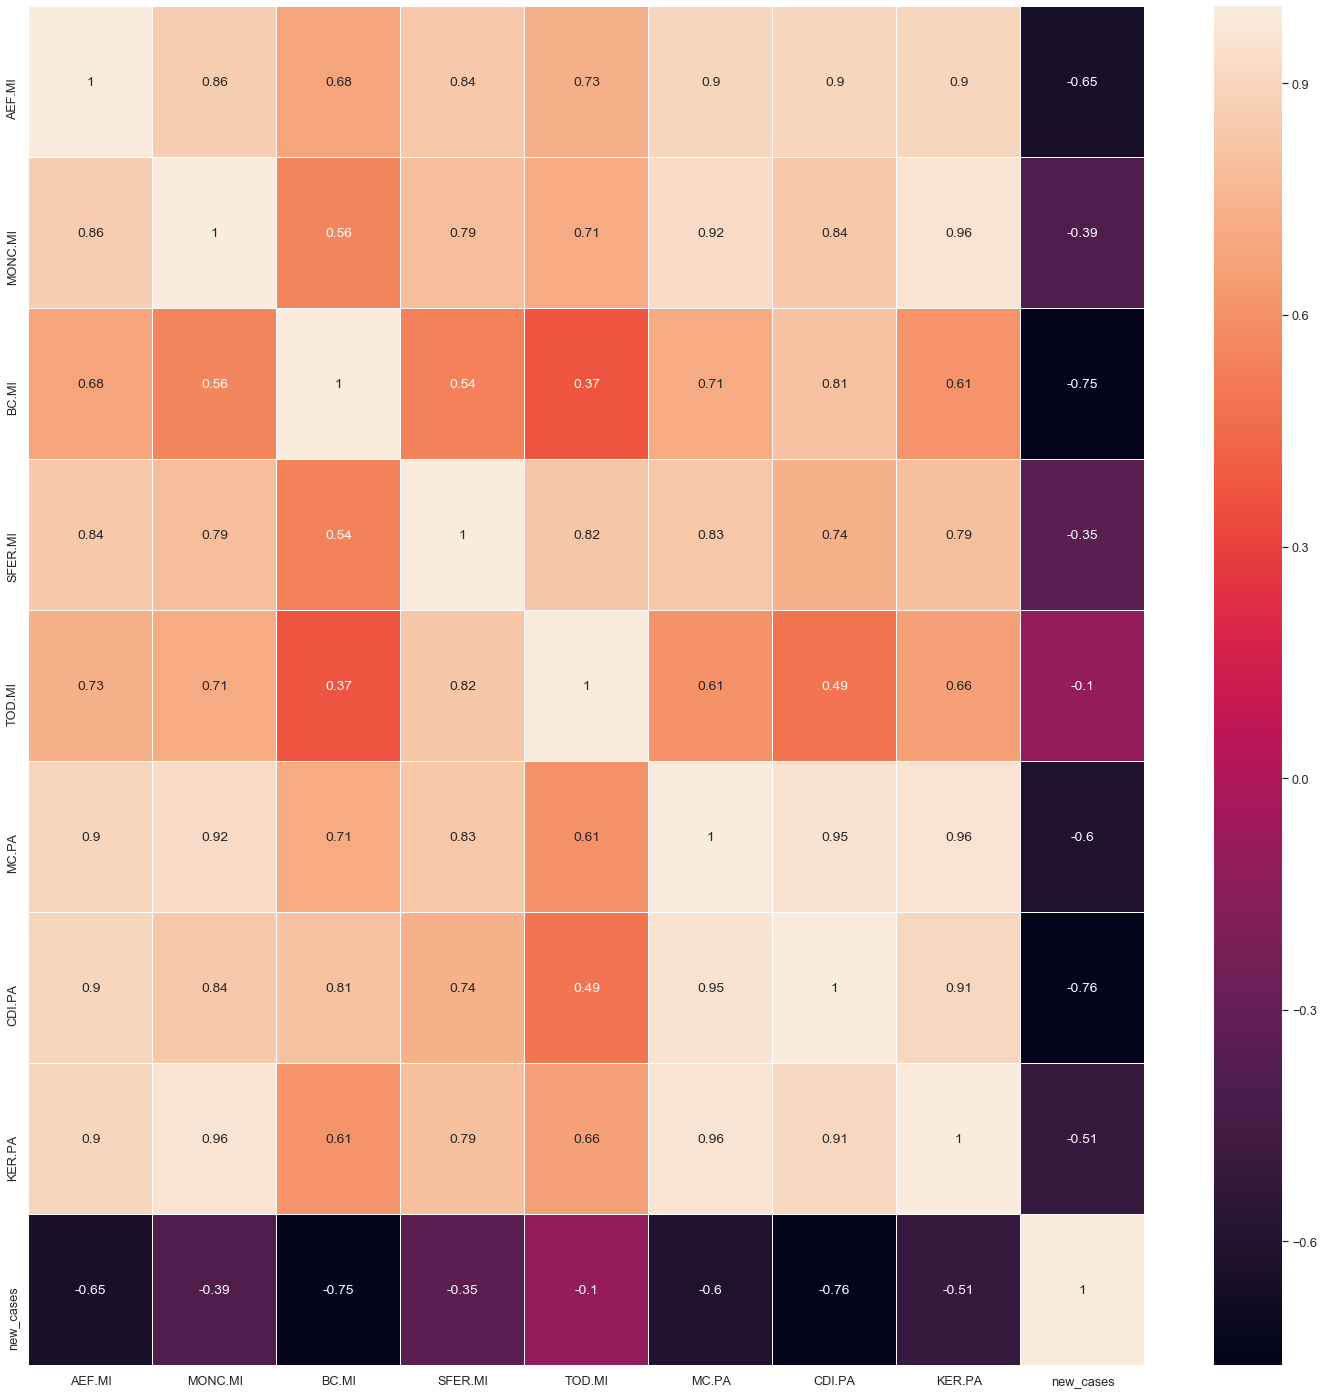

<Figure size 432x288 with 0 Axes>

In [118]:
plt.figure(figsize=(25,25))
sns.set(font_scale=1.15)
sns.heatmap(covid.corr(),linewidths=.5,annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()
plt.tight_layout()

In this heatmap if we checked the last row we can see that with some companies the relationship is strong, when the COVID-19 infected cases increase, the stock price decrease.

# Conclusion

The data collected showed that the stock market has drifted hard due to COVID-19, The impact is increased by the fact that many companies have limited visibility into their risk exposure or supply chain. However, hard times can be a reflection of your own resilience, the data from Moncler stock price has showed a great performance during this crisis, which indicate business and brand flexibility and strength, followed by the giants LVMH and Kering Groups. And for that reason, companies today understand they have a responsibility to their customers, employees, and stakeholders to be successful in both financial and social terms, many brands have responded with bold approaches to give stakeholders a reason to believe that they will get through this crisis and move forward together.  